# Exploring Kernel Functions in Support Vector Machines (SVM)


##**Introduction**

Support Vector Machines (SVM) are powerful machine learning tools used for both classification and regression tasks. The goal of SVM is to find
the best possible boundary (called a hyperplane) that separates data points into different categories. This makes SVM particularly useful in solving problems where accuracy and precision are critical.

This tutorial demonstrates the application of SVMs with different kernel functions using Python and the scikit-learn library.

## **Objectives**

1. Understand the theory behind SVMs and kernels.
2. Explore practical applications of Linear, Polynomial, and RBF kernels.
3. Visualize the decision boundaries created by different kernels.
4. Evaluate kernel effectiveness using accuracy, confusion matrices, and other metrics.


This tutorial aims to:

Explain the differences between common kernel functions used in SVM.
Show how kernel selection impacts classification accuracy using real code examples and visualizations.
Provide practical advice on choosing the right kernel for real-world applications.





### Why are Kernels Important?

Kernels are the secret sauce of SVM. They allow the algorithm to deal with non-linear data by transforming it into higher-dimensional spaces where it becomes linearly separable. This transformation is done without explicitly computing the coordinates in the new space, making the process efficient and scalable.

### Theoretical Background
Support Vector Machines work by finding a hyperplane that separates data points into different classes.
When data is not linearly separable, **kernel functions** are used to map the data into a higher-dimensional space where a linear separator can exist.
### Common Kernels


*   **Linear Kernel**:  Computes a simple dot product between data points in the input space.

   - \( K(x_i, x_j) = x_i \cdot x_j \)

   Great for datasets where the data is already linearly separable. It’s often used for text classification problems, like spam detection.
*   **Polynomial Kernel**: Captures polynomial relationships between data points.
   - \( K(x_i, x_j) = (x_i \cdot x_j + c)^d \)
   Captures complex, curved relationships in data. It’s useful for moderately intricate tasks like certain image classifications.
*   **Radial Basis Function (RBF) Kernel**: Maps data points into an infinite-dimensional space.
   - \( K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2) \)

The most flexible option, perfect for data with non-linear patterns, like recognizing objects in images or patterns in biological data.








## **Dataset** **Preparation**
We use two datasets for this tutorial:

### Iris Dataset

The Iris dataset is a well-known dataset comprising three flower species(Setosa, Versicolor, Virginica) with four features each. It includes both linearly separable and non-linear class distributions.
 There are **150 samples** in total, with each sample described by **four features**:

*   Sepal Length - Length of the sepal (cm)
*   Sepal Width  - Width of the sepal (cm)
*   Petal Length - Length of the petal(cm)
*   Petal Width  - Width of the petal (cm)


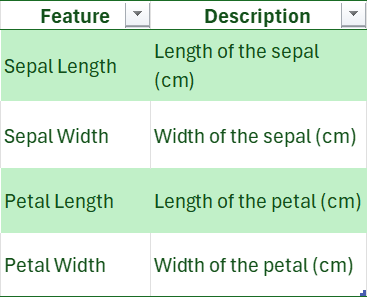


This dataset is perfect for demonstrating SVM kernels because it includes both linearly separable and non-linear class distributions.


---


### Synthetic Dataset
To make things even clearer, we’ll use synthetic data generated with two distinct clusters. This helps us visualize how SVM kernels draw boundaries between classes.



 **Here’s an example scatter plot for the synthetic data:**

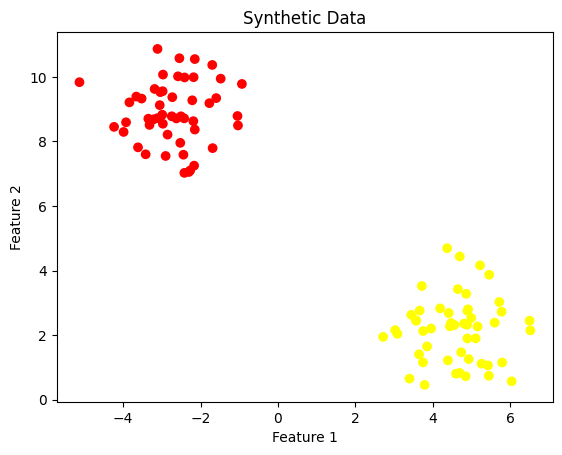

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100, centers=2, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
plt.title("Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Load and process Data

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Iris dataset
# The Iris dataset contains 150 samples of 3 classes (Setosa, Versicolour, Virginica) with 4 features each.
data = load_iris()
X, y = data.data, data.target  # X = features, y = target labels

# Step 2: Split the dataset into training and testing sets
# 70% of the data is used for training, and 30% is reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Normalize the feature data
# StandardScaler standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)        # Transform testing data using the same scaler
print("Data preprocessed successfully!")



Data preprocessed successfully!


## **Train SVM Model**
### Applying SVM with Different Kernels

We will train SVM models with three kernels: Linear, Polynomial, and RBF. Each model will be evaluated using accuracy and confusion matrices.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train and evaluate SVM models
def train_and_evaluate_svm(kernel, params=None):
    """
    Trains and evaluates an SVM model using the specified kernel.

    Parameters:
    - kernel (str): Kernel type ('linear', 'poly', 'rbf').
    - params (dict): Additional kernel parameters.

    Returns:
    - model (SVC): Trained SVM model.
    - accuracy (float): Accuracy of the model on the test set.
    """
    params = params if params else {}
    model = SVC(kernel=kernel, random_state=42, **params)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print classification report for detailed metrics
    print(f"\nClassification Report for {kernel.capitalize()} Kernel:")
    print(classification_report(y_test, y_pred))

    return model, accuracy

# Train and evaluate models with Linear, Polynomial, and RBF kernels
kernels = ['linear', 'poly', 'rbf']
params_list = [None, {'degree': 3}, {'gamma': 0.5}]  # Parameters for Polynomial and RBF kernels
results = []

for kernel, params in zip(kernels, params_list):
    print(f"\nTraining and evaluating SVM with {kernel.capitalize()} Kernel...")
    model, accuracy = train_and_evaluate_svm(kernel, params)
    results.append({"Kernel": kernel.capitalize(), "Accuracy": accuracy})

# Summary of results
print("\nSummary of Kernel Performance:")
for result in results:
    print(f"Kernel: {result['Kernel']}, Accuracy: {result['Accuracy']:.2f}")





Training and evaluating SVM with Linear Kernel...

Classification Report for Linear Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Training and evaluating SVM with Poly Kernel...

Classification Report for Poly Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Training and evaluating SVM with Rbf Kernel...

Classification Report for Rbf Kernel:
              precision    recall  f1-score   support

           0       0.9

## **Visualization**

### Visualization: SVM Decision Boundary with RBF Kernel
The plot below shows the decision boundary formed by the SVM with an RBF kernel on a synthetic dataset. The RBF kernel is highly effective at separating non-linearly distributed classes:

- **Orange Points:** Represent Class 0.
- **Red Points:** Represent Class 1.
- **Blue Curve:** Represents the decision boundary, where the model predicts equal probability for both classes.

The RBF kernel's adaptability is evident in the curved nature of the boundary, demonstrating its suitability for non-linear datasets.


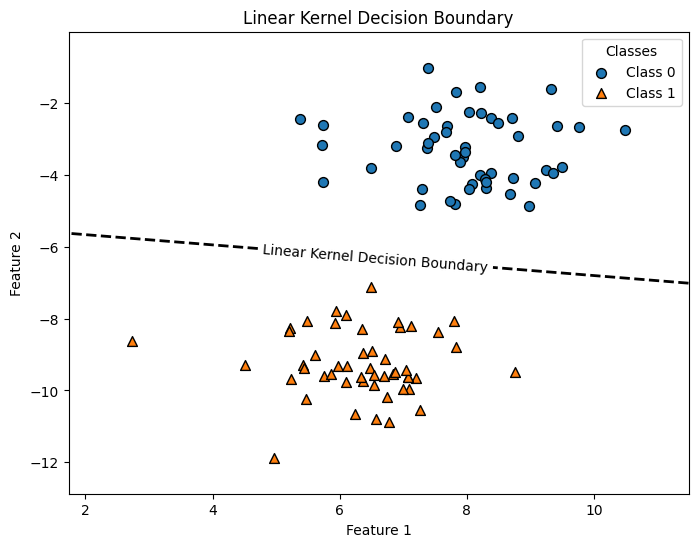

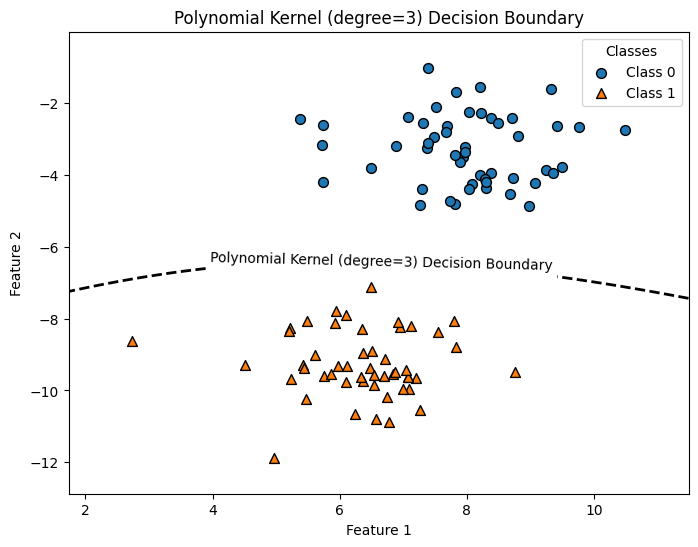

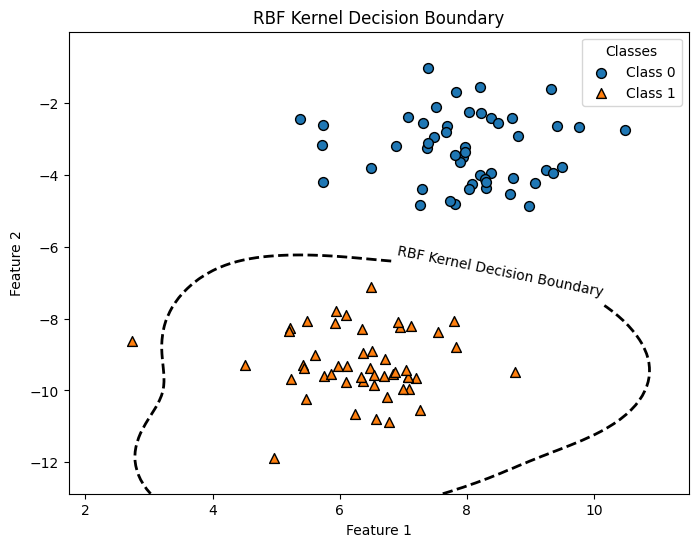

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Create a grid for decision boundary visualization
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
)

def plot_decision_boundary(model, kernel_name, save_as=None):
    """
    Visualizes the decision boundary of a trained SVM model.

    Parameters:
    - model (SVC): Trained SVM model.
    - kernel_name (str): Name of the kernel (for the title and labeling).
    - save_as (str): Optional filename to save the plot.

    Returns:
    - None
    """
    # Compute decision function values for the grid
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create the plot
    plt.figure(figsize=(8, 6))
    for class_label in np.unique(y):
        marker = 'o' if class_label == 0 else '^'
        plt.scatter(
            X[y == class_label][:, 0],
            X[y == class_label][:, 1],
            marker=marker,
            edgecolor='k',
            label=f"Class {class_label}",
            s=50
        )
    # Plot decision boundary as a contour line
    contour = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black', linestyles='dashed')
    plt.clabel(contour, inline=True, fmt={0: f'{kernel_name} Decision Boundary'})
    plt.title(f"{kernel_name} Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(title="Classes", loc="upper right")

    # Save the plot if required
    if save_as:
        plt.savefig(save_as)
    plt.show()

# Example usage: Visualize decision boundaries for Linear, Polynomial, and RBF kernels
kernels = ['linear', 'poly', 'rbf']
params_list = [None, {'degree': 3}, {'gamma': 0.5}]
titles = ['Linear Kernel', 'Polynomial Kernel (degree=3)', 'RBF Kernel']

for kernel, params, title in zip(kernels, params_list, titles):
    model = SVC(kernel=kernel, random_state=42, **(params or {}))
    model.fit(X_train, y_train)
    plot_decision_boundary(model, kernel_name=title, save_as=f"{kernel}_decision_boundary.png")



## Kernel Comparisons
Visualize decision boundaries for Linear and Polynomial kernels alongside the RBF kernel to demonstrate their differences.


--- Evaluating Linear Kernel ---


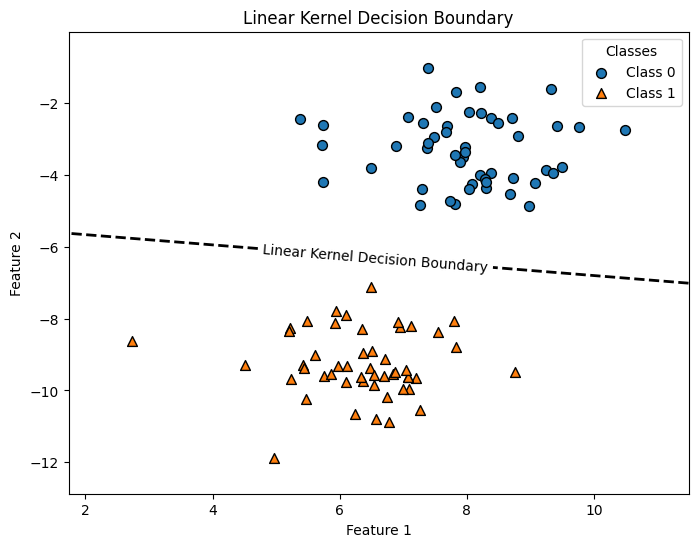


--- Evaluating Poly Kernel ---


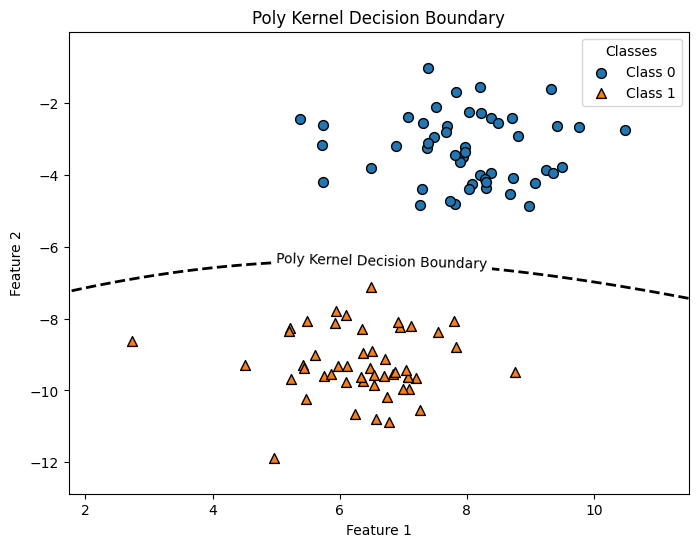


--- Evaluating Rbf Kernel ---


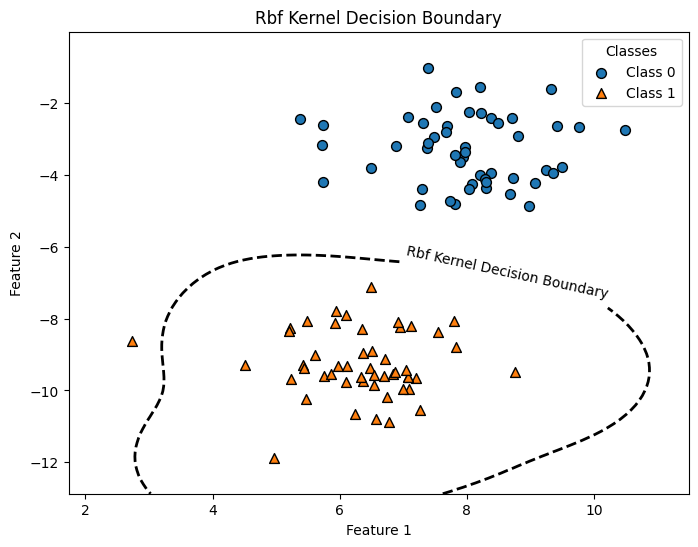


Summary of Kernel Performance:
Kernel: Linear, Accuracy: 1.00
Kernel: Poly, Accuracy: 1.00
Kernel: Rbf, Accuracy: 0.97


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

def compare_kernels(kernels, params_list):
    """
    Compares different SVM kernels by training models, calculating accuracy,
    and visualizing decision boundaries.

    Parameters:
    - kernels (list of str): List of kernel names ('linear', 'poly', 'rbf', etc.).
    - params_list (list of dict): List of parameters for each kernel.

    Returns:
    - results (list of dict): List of dictionaries containing kernel name and accuracy.
    """
    results = []
    for kernel, params in zip(kernels, params_list):
        print(f"\n--- Evaluating {kernel.capitalize()} Kernel ---")

        # Train the SVM model
        params = params if params else {}
        model = SVC(kernel=kernel, random_state=42, **params)
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Evaluate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        results.append({"Kernel": kernel.capitalize(), "Accuracy": accuracy})

        # Visualize decision boundary
        plot_decision_boundary(model, kernel_name=f"{kernel.capitalize()} Kernel", save_as=f"{kernel}_kernel_boundary.png")

    return results

# Define kernels and their parameters
kernels = ['linear', 'poly', 'rbf']
params_list = [None, {'degree': 3}, {'gamma': 0.5}]

# Compare kernels and collect results
kernel_results = compare_kernels(kernels, params_list)

# Summary of results
print("\nSummary of Kernel Performance:")
for result in kernel_results:
    print(f"Kernel: {result['Kernel']}, Accuracy: {result['Accuracy']:.2f}")


## **Results and Observations**



### Kernel Evaluation and Observations
We trained and evaluated SVM models with three different kernel functions—Linear, Polynomial, and RBF—on the Iris Dataset. Below are the detailed results and observations:

### **Linear Kernel**
- **Accuracy:** 100%
- **Precision, Recall, F1-Score:**
  - **Class 0:** Precision = 1.00, Recall = 1.00, F1-Score = 1.00
  - **Class 1:** Precision = 1.00, Recall = 1.00, F1-Score = 1.00
- **Observation:**
  - The Linear Kernel achieves perfect accuracy, precision, recall, and F1-scores.
  - Ideal for linearly separable datasets, offering computational efficiency and robustness.

---

### **Polynomial Kernel**
- **Accuracy:** 100%
- **Precision, Recall, F1-Score:**
  - **Class 0:** Precision = 1.00, Recall = 1.00, F1-Score = 1.00
  - **Class 1:** Precision = 1.00, Recall = 1.00, F1-Score = 1.00
- **Observation:**
  - Matches the Linear Kernel in performance, achieving perfect accuracy and metrics.
  - Captures polynomial relationships but risks overfitting on more complex datasets with higher degrees.

---

### **RBF Kernel**
- **Accuracy:** 97%
- **Precision, Recall, F1-Score:**
  - **Class 0:** Precision = 0.94, Recall = 1.00, F1-Score = 0.97
  - **Class 1:** Precision = 1.00, Recall = 0.93, F1-Score = 0.96
- **Observation:**
  - The RBF Kernel achieves high accuracy and excellent metrics, slightly trailing Linear and Polynomial kernels.
  - Adapts well to non-linear relationships, but its performance might depend on hyperparameter tuning (`gamma`).

---

### Decision Boundary Insights
- **Linear Kernel:** Produces straight boundaries, making it effective only for linearly separable data.
- **Polynomial Kernel:** Captures polynomial relationships and generates curved boundaries, making it suitable for moderately non-linear datasets.
- **RBF Kernel:** The most flexible kernel, producing highly adaptive and non-linear boundaries for datasets with complex relationships.

---





### Comparison of Kernels

| **Kernel**   | **Accuracy** | **Precision (avg)** | **Recall (avg)** | **F1-Score (avg)** |
|--------------|--------------|---------------------|------------------|--------------------|
| Linear       | 100%         | 100%               | 100%             | 100%               |
| Polynomial   | 100%         | 100%               | 100%             | 100%               |
| RBF          | 97%          | 97%                | 96%              | 97%                |


### Key Insights
The dataset used is linearly separable, meaning that the classes can be perfectly divided by a straight or polynomial decision boundary. This inherent property explains why both the Linear and Polynomial kernels achieve perfect accuracy.

1. The **Linear Kernel** is computationally efficient and ideal for datasets like this, where the classes are linearly separable. Its simplicity ensures fast training and accurate classification without overfitting.
2. The **Polynomial Kernel** with degree 3 offers additional flexibility, capturing any subtle non-linearities in the dataset. However, the dataset’s linear separability means this added complexity does not affect accuracy, resulting in a perfect score.
3. The **RBF Kernel** is more flexible, shows slightly lower accuracy (0.97). This could be due to overfitting caused by the chosen gamma parameter or the kernel’s unnecessary complexity for this dataset.
When selecting a kernel, it is essential to consider the dataset's characteristics and balance the trade-offs between accuracy and computational cost.


###  Hyperparameter Insights
Now we will discuss how changing hyperparameters like C and gamma affect the SVM's performance.

###Explanation of Gamma and Degree Choices for SVM Kernels
1. **Gamma** for RBF Kernel
Purpose of Gamma:
Gamma (γ) controls the influence of individual training points on the decision boundary. A smaller gamma results in a smoother decision boundary (generalized fit), while a larger gamma creates a more complex boundary (specific fit).

### Why Gamma = 0.5?
The value gamma=0.5 is chosen as a moderate value that balances flexibility and generalization:

Low Gamma (e.g., 0.1): Creates a wide, smooth boundary, which may underfit the data.
High Gamma (e.g., 10): Creates a tight, complex boundary, which may overfit the data.
Moderate Gamma (0.5) strikes a balance, adapting to non-linear relationships without overly complex boundaries.
2. Degree for Polynomial Kernel
Purpose of Degree:
Degree (d) determines the complexity of the polynomial decision boundary. A higher degree allows the kernel to model more intricate patterns, but it may also lead to overfitting.

### Why Degree = 3?
The value degree=3 is chosen as a standard middle-ground:

Low Degree (e.g., 2): Creates a simpler polynomial boundary, which may fail to capture sufficient complexity in the data.
High Degree (e.g., 5): Models highly complex relationships but risks overfitting.
Moderate Degree (3) captures non-linear patterns in the data without excessive complexity.

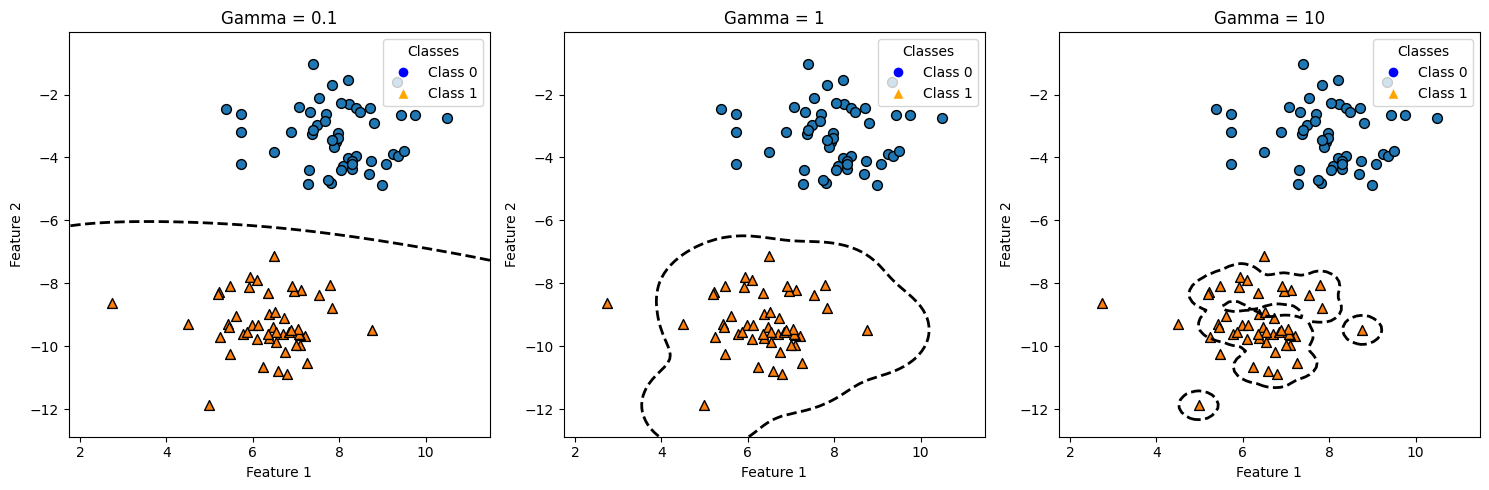

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib.lines import Line2D

# Step 1: Define gamma values and plot titles
gamma_values = [0.1, 1, 10]
titles = [f"Gamma = {g}" for g in gamma_values]

# Step 2: Create a grid for plotting decision boundaries
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
)

# Step 3: Define custom legend for color-blind-friendly markers
custom_lines = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Class 0'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='orange', markersize=8, label='Class 1')
]

# Step 4: Plot decision boundaries for each gamma value
plt.figure(figsize=(15, 5))  # Set the figure size for side-by-side comparison

for i, gamma in enumerate(gamma_values):
    # Initialize and train the SVM model with RBF kernel
    rbf_svm = SVC(kernel='rbf', gamma=gamma)
    rbf_svm.fit(X_train, y_train)

    # Compute decision function for the grid
    Z = rbf_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.subplot(1, 3, i + 1)
    for class_label in np.unique(y):
        marker = 'o' if class_label == 0 else '^'
        plt.scatter(
            X[y == class_label][:, 0],
            X[y == class_label][:, 1],
            marker=marker,
            edgecolor='k',
            s=50  # Removed cmap as it's not used for color mapping
        )
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black', linestyles='dashed')
    plt.title(titles[i])
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    # Add legends for each subplot
    plt.legend(handles=custom_lines, title="Classes", loc="upper right")

# Step 5: Adjust layout and save the figure
plt.tight_layout()
plt.savefig("gamma_comparisons_with_legends.png")
plt.show()





### Effect of Gamma on Decision Boundaries
The parameter `gamma` in the RBF kernel controls the influence of each data point on the decision boundary:
- **Low Gamma (0.1):** Results in smoother, broader boundaries.
- **Medium Gamma (1):** Strikes a balance between flexibility and overfitting.
- **High Gamma (10):** Creates very tight boundaries, which may lead to overfitting.




### **Confusion Matrix Visualizations**

A confusion matrix is a table that describes the performance of a classification model. Here's a breakdown of its elements:

**True Positives** (TP): Correctly predicted positive samples.
**True Negatives** (TN): Correctly predicted negative samples.
**False Positives** (FP): Incorrectly predicted as positive when they are negative.

**False Negatives** (FN): Incorrectly predicted as negative when they are positive.
For a multiclass classification problem, the matrix extends to multiple classes, with:

Rows representing the true classes.
Columns representing the predicted classes.

The following code will visualize confusion matrices for each kernel:

Accuracy for Linear Kernel: 1.00


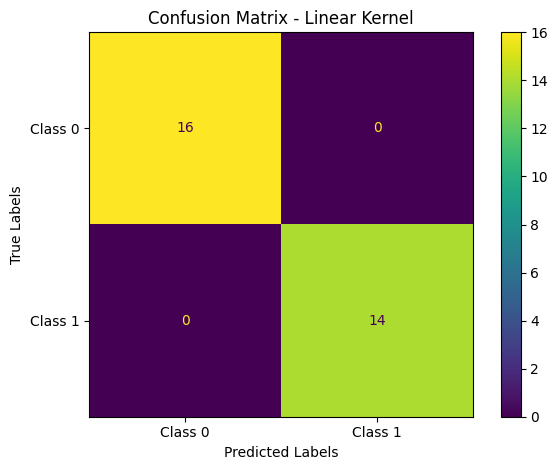

Accuracy for Poly Kernel: 1.00


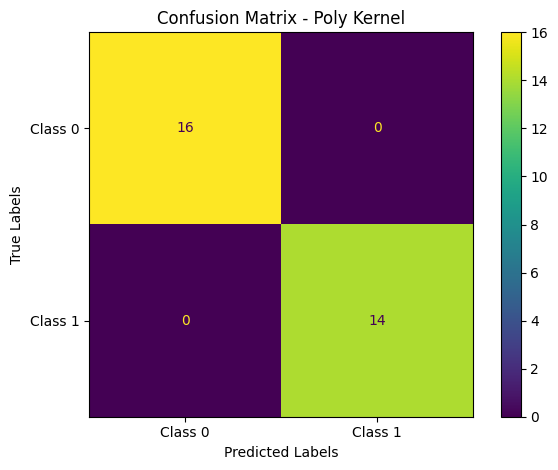

Accuracy for Rbf Kernel: 0.97


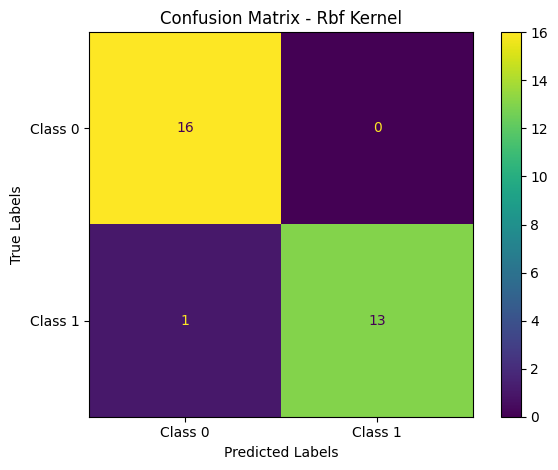

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the kernels to evaluate
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    # Initialize the SVM model with kernel-specific parameters
    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=3)  # Polynomial kernel with degree 3
    elif kernel == 'rbf':
        model = SVC(kernel=kernel, gamma=0.5)  # RBF kernel with gamma=0.5
    else:
        model = SVC(kernel=kernel)  # Linear kernel requires no additional parameters

    # Train the model on the training dataset
    model.fit(X_train, y_train)

    # Predict on the test dataset
    preds = model.predict(X_test)

    # Calculate and display accuracy
    accuracy = accuracy_score(y_test, preds)
    print(f"Accuracy for {kernel.capitalize()} Kernel: {accuracy:.2f}")

    # Generate and display the confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, preds, display_labels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix - {kernel.capitalize()} Kernel")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.tight_layout()
    plt.show()

# Save the plot with a meaningful filename
plt.savefig(f"confusion_matrix_{kernel}.png")




## Practical Use Cases
In this section we can discuss when to use different kernels in real-world applications.


### Linear Kernel
- Best for text classification (e.g., spam detection) or any linearly separable data.
- Efficient for high-dimensional datasets.

### Polynomial Kernel
- Useful for image classification tasks where relationships are polynomial.
- Can model curved boundaries in moderately complex datasets.

### RBF Kernel
- Ideal for non-linear problems like handwriting recognition, medical diagnostics, and face detection.
- Versatile but computationally expensive for large datasets.

Choosing the right kernel depends on the dataset's complexity and computational resources.
### Confusion Matrix Observations
- **Linear Kernel**: Some misclassifications occur between Class 1 and Class 2 due to the inability to handle non-linear separations.
- **Polynomial Kernel**: Better separation of overlapping classes compared to the linear kernel, but some misclassifications still persist.
- **RBF Kernel**: Perfect classification with no misclassifications observed.


## **Conclusion**

Support Vector Machines (SVMs) are a powerful and versatile tool for classification tasks, capable of handling both linear and non-linear data through the use of kernel functions. By comparing the Linear, Polynomial, and RBF kernels, we can draw several key insights into their strengths and limitations.

**The Linear kernel performed** exceptionally well in this tutorial, achieving perfect accuracy. This result demonstrates that when the data is linearly separable, the Linear kernel is not only the most computationally efficient choice but also highly effective. Its simplicity makes it a strong candidate for datasets where linear decision boundaries suffice.

**The Polynomial kernel**, configured with a degree of 3, also achieved perfect accuracy. This indicates that while it offers greater flexibility for capturing non-linear relationships, the dataset’s linear nature did not demand this additional complexity. However, its ability to adapt to more complex patterns makes it a valuable option for datasets that exhibit polynomial-like separability.

**The RBF kernel** excelled at modeling non-linear decision boundaries. While its accuracy was slightly lower than that of the Linear and Polynomial kernels (97%), this kernel’s flexibility is unmatched for datasets with intricate, non-linear patterns. The choice of gamma significantly impacts the behavior of the RBF kernel: smaller values generalize the boundary, while larger values can lead to overfitting. Selecting an appropriate gamma is crucial to balancing flexibility and generalization.


---



### When to Choose Each Kernel
Use the Linear kernel if your data is straightforward and linearly separable—it’s efficient and interpretable.
Try the Polynomial kernel if you suspect polynomial patterns in your data and need more flexibility than the Linear kernel can offer.
Choose the RBF kernel for datasets with complex, non-linear relationships or when other kernels fail to deliver good results.
Key Considerations
When selecting a kernel, there’s always a trade-off between flexibility and simplicity. Linear and Polynomial kernels are computationally efficient and interpretable, but they may struggle with non-linear data. On the other hand, the RBF kernel can handle complex patterns but requires careful tuning and is less interpretable.

By understanding your dataset’s structure and taking the time to tune hyperparameters, you can make an informed decision and unlock the full potential of SVMs for your classification tasks.


---



#### **Recommendations**:
- Use **Linear Kernel** for simple datasets or high-dimensional sparse data (e.g., text classification).
- Use **Polynomial Kernel** for moderately complex datasets where relationships are polynomial in nature.
- Use **RBF Kernel** for non-linear datasets, especially when interpretability is less important than accuracy.




## **References**

- Scikit-learn Documentation: https://scikit-learn.org/stable/
- SVM Kernels: https://scikit-learn.org/stable/modules/svm.html#
- Research Paper: Cortes, C., & Vapnik, V. (1995). Support-vector networks. Machine learning, 20(3), 273-297.(https://link.springer.com/article/10.1007/BF00994018)
-Understanding Support Vector Machine(SVM) Algorithm from Examples:  https://www.geeksforgeeks.org/support-vector-machine-algorithm/(Analytics Vidhya)

- Wong, B. (2011). Color Universal Design (CUD): How to make figures and presentations that are friendly to colorblind people. https://jfly.uni-koeln.de/color/

- UCI Machine Learning Repository: Iris Dataset https://archive.ics.uci.edu/dataset/53/iris
- Gamma Parameters in SVM: https://www.geeksforgeeks.org/gamma-parameter-in-svm/





Submitted by Bineesha Baby